## Business Understanding
Tujuan: rekomendasi pembelian rumah yang tepat dan menguntungkan, memilih rumah yang tepat berdasarkan atribut2 
Tujuan Data Science: 
- mengidentifikasi bagaimana atribut rumah yang tepat dan menguntungkan: menganalisis dan memvisualisasikan pengaruh antara atribut dan harga rumah
- memprediksi rumah yang tepat dan menguntungkan

Permasalahan: pemilihan keputusan yang tepat
Kebutuhan: 
Analisis:

rumah yang bagus atributnya:
1. price terendah
2. luas ruangan besar (bedrooms, bathrooms, sqft living, sqft lot, floors, sqft_above, sqft_basement, view)
3. waterfront = 1, view = 1
4. yr_built paling besar. minimal 1990
    jika yr_built < 1990, maka yr_renovated harus ada setelah 2000

In [1]:
import pandas as pd

df = pd.read_csv('data_porto_2.csv', index_col='date', parse_dates=True)
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
date,,,,,,,,,,,,,,,,,
2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
2014-05-02,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
2014-05-02,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
2014-05-02,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
2014-05-02,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA


In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,date_numeric
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,1.402111e+09
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,1.702786e+06
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,1.398989e+09
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,1.400630e+09
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,1.402272e+09
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,1.403568e+09
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,1.404950e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  date_numeric   4600 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 503.3 KB


In [10]:
df.shape

(4600, 14)

## Data Preparation

## Explatory Data Analysis

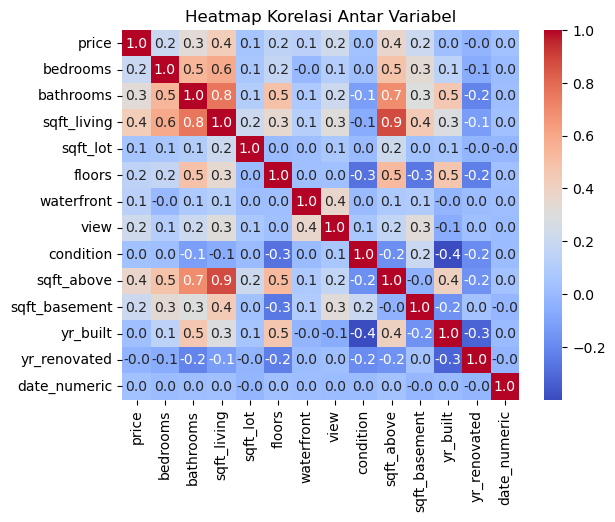

In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data_porto_2.csv') 
df = pd.DataFrame(data)

# Ubah 'date' menjadi datetime
df['date'] = pd.to_datetime(df['date'])

# Tambahkan kolom numerik dari 'date'
df['date_numeric'] = df['date'].map(pd.Timestamp.timestamp)

# Drop kolom 'date' jika tidak dibutuhkan
df = df.drop(columns=['date'])
df = df.drop(columns=['street'])
df = df.drop(columns=['city'])
df = df.drop(columns=['statezip'])
df = df.drop(columns=['country'])
		

# Hitung korelasi dan visualisasi heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()



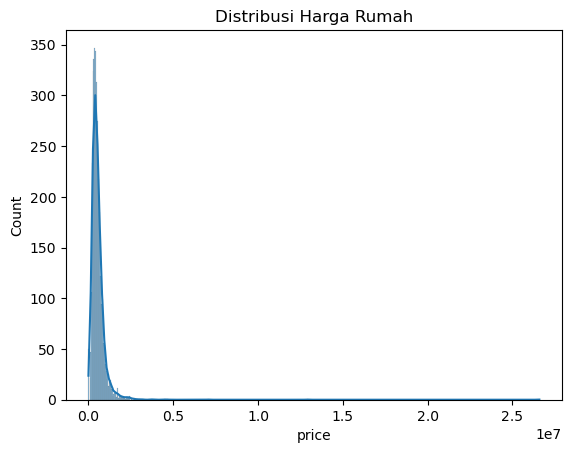

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price'], kde=True)
plt.title('Distribusi Harga Rumah')
plt.show()


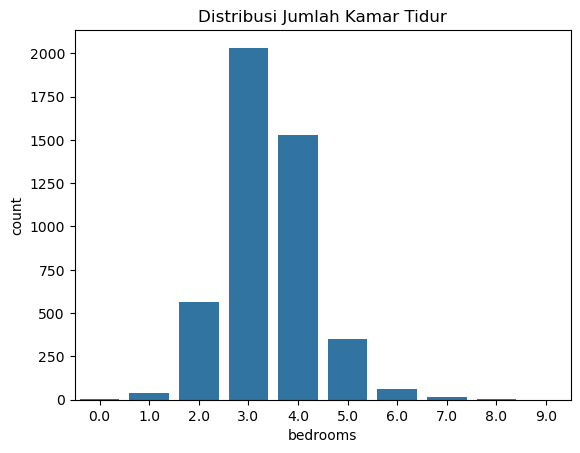

In [5]:
sns.countplot(x='bedrooms', data=df)
plt.title('Distribusi Jumlah Kamar Tidur')
plt.show()

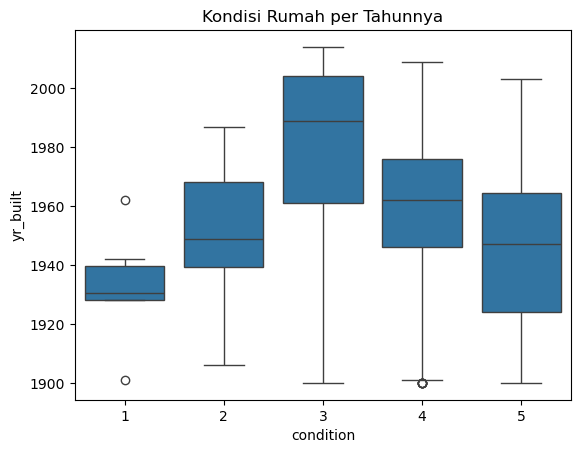

In [6]:
sns.boxplot(x='condition', y='yr_built', data=data)
plt.title('Kondisi Rumah per Tahunnya')
plt.show()


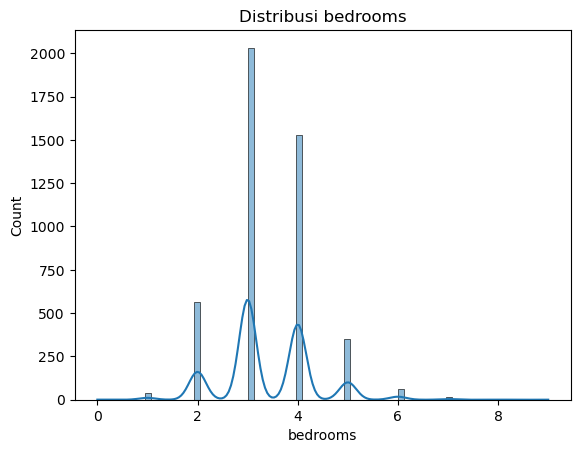

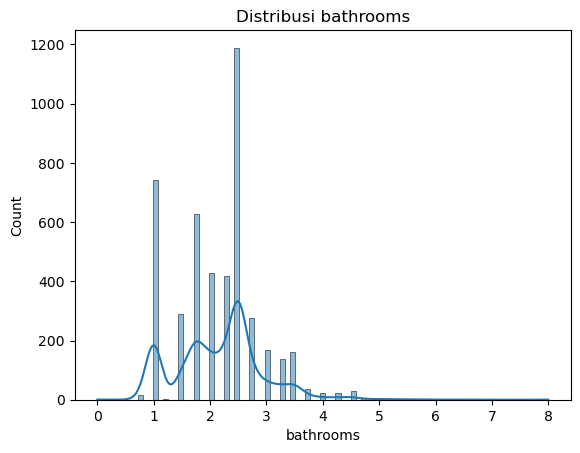

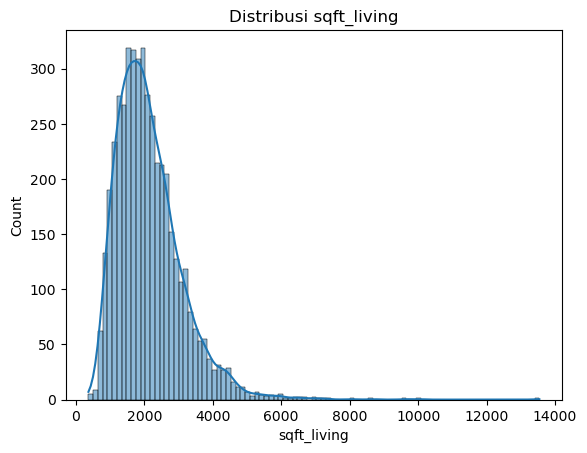

In [12]:
for col in ['bedrooms', 'bathrooms', 'sqft_living']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

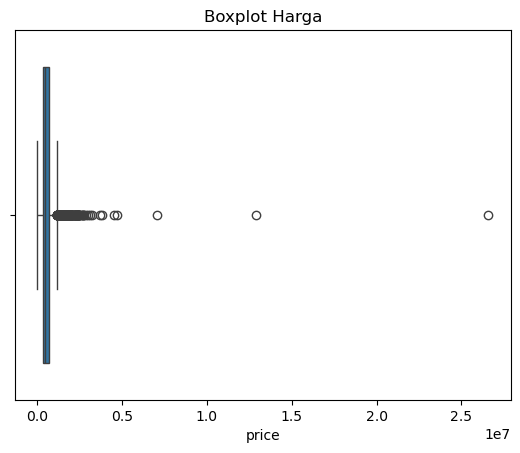

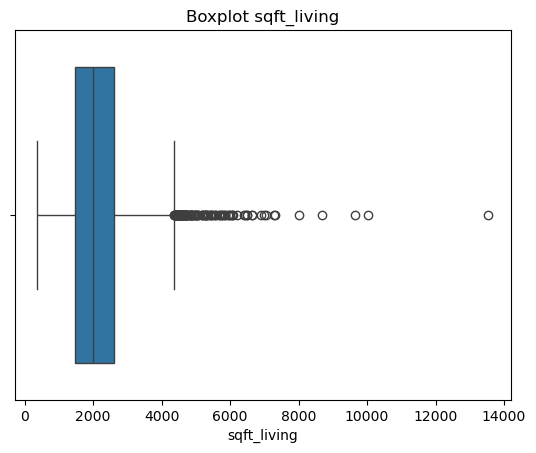

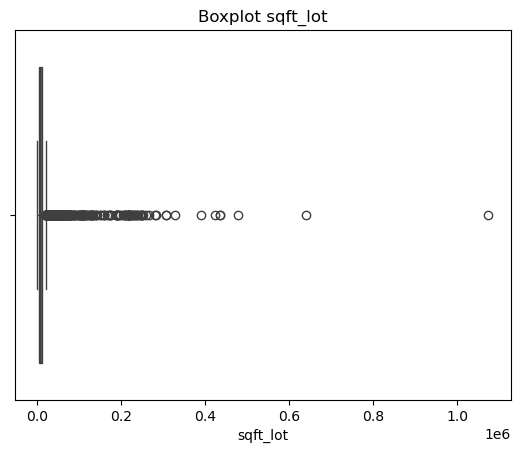

In [14]:
#Outlier
# Boxplot harga
sns.boxplot(x=df['price'])
plt.title('Boxplot Harga')
plt.show()

# Boxplot untuk beberapa fitur
for col in ['sqft_living', 'sqft_lot']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()


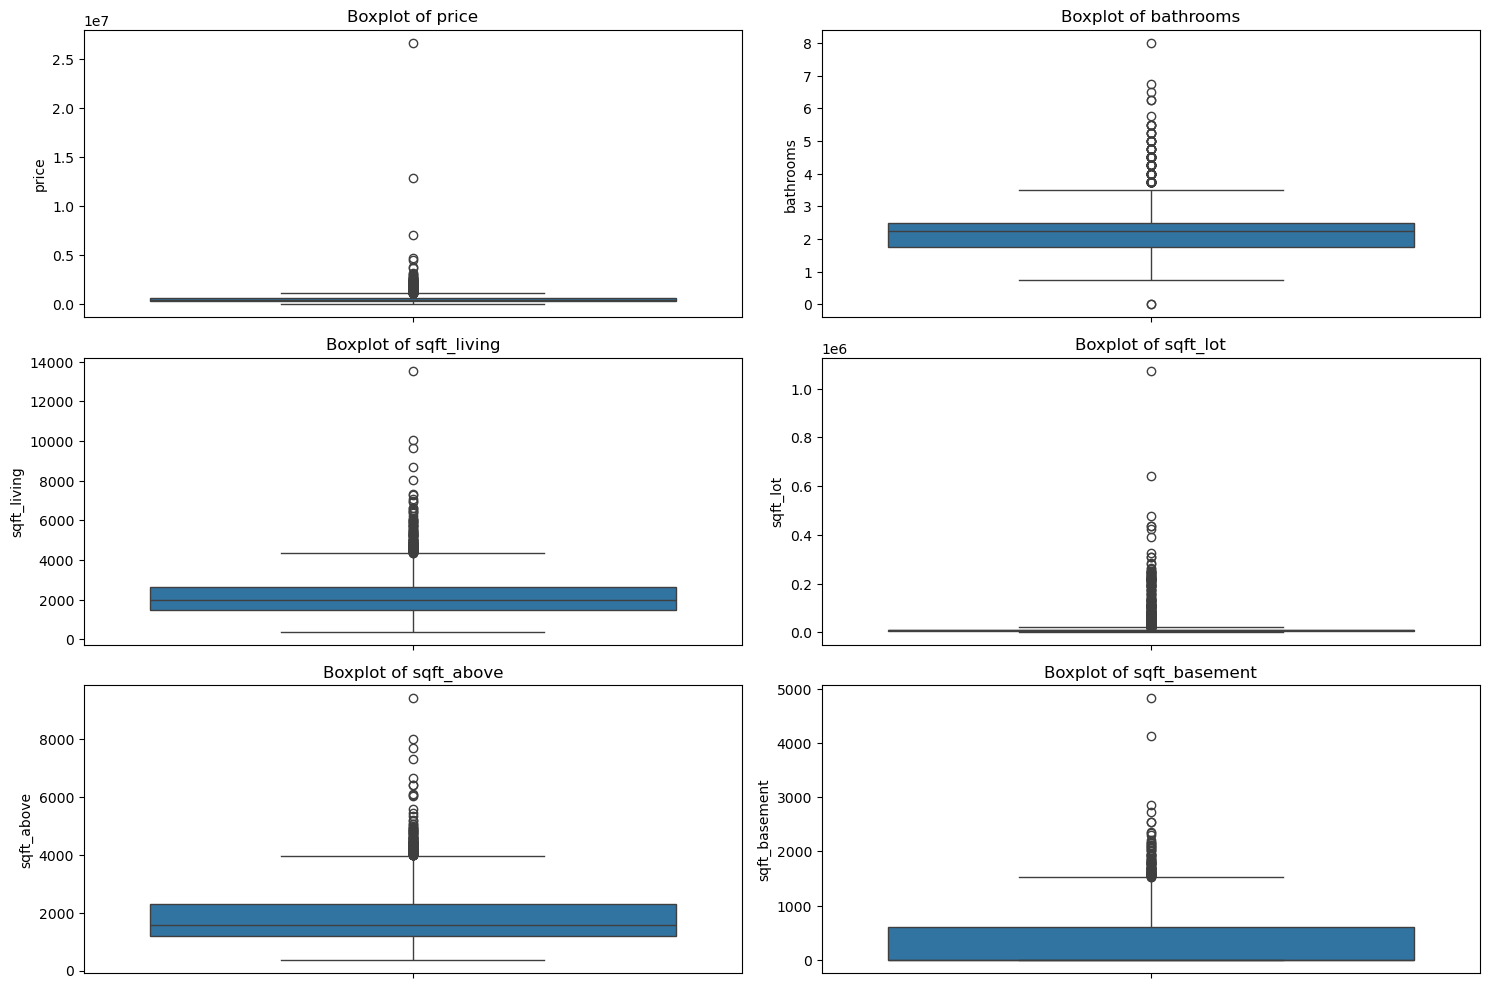

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih kolom yang ingin ditampilkan boxplot
columns_to_plot = ['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

# Ukuran figure
plt.figure(figsize=(15, 10))

# Loop melalui kolom yang dipilih untuk membuat boxplot
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot((len(columns_to_plot) + 1) // 2, 2, i)  # Atur grid 2 kolom
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel(col)

# Tampilkan plot
plt.tight_layout()
plt.show()


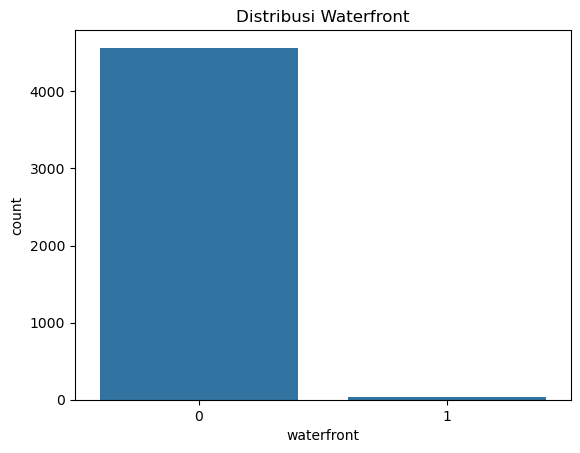

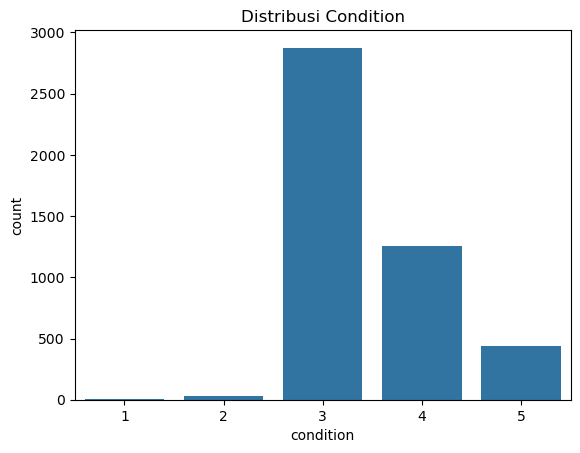

In [16]:
# Distribusi waterfront
sns.countplot(x='waterfront', data=df)
plt.title('Distribusi Waterfront')
plt.show()

# Distribusi condition
sns.countplot(x='condition', data=df)
plt.title('Distribusi Condition')
plt.show()


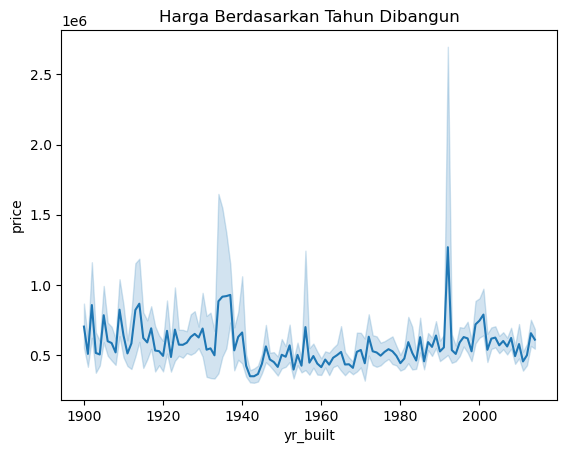

In [18]:
# Harga berdasarkan tahun dibangun
sns.lineplot(x='yr_built', y='price', data=df)
plt.title('Harga Berdasarkan Tahun Dibangun')
plt.show()


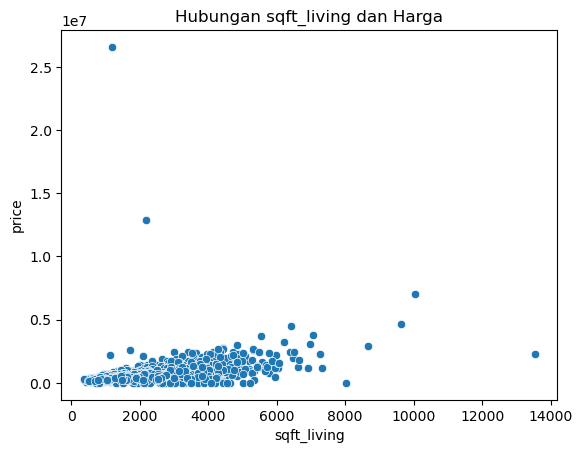

In [20]:
# Scatter plot
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Hubungan sqft_living dan Harga')
plt.show()


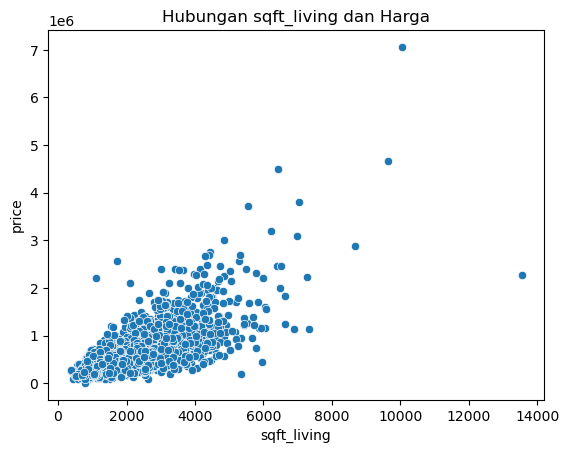

In [31]:
# Hapus data dengan sqft_lot > 14000
df_cleaned = df[df['sqft_lot'] <= 12000]
df_cleaned = df[(df['price'] <= 10000000) & (df['price'] > 0)]
# df_cleaned = df[df['price'] > 0]

# Scatter plot
sns.scatterplot(x='sqft_living', y='price', data=df_cleaned)
plt.title('Hubungan sqft_living dan Harga')
plt.show()


In [26]:
## rekomendasi


## rekomendasi

In [32]:
# Syarat 1: Rumah yang dibangun minimal tahun 1990
built_after_1990 = df_cleaned[df_cleaned['yr_built'] >= 1990]

# Syarat 2: Rumah yang dibangun sebelum tahun 1990, tetapi direnovasi setelah tahun 2000
renovated_after_2000 = df_cleaned[(df_cleaned['yr_built'] < 1990) & (df_cleaned['yr_renovated'] > 2000)]

# Gabungkan kedua hasil filter
filtered_houses = pd.concat([built_after_1990, renovated_after_2000])

# Berikan rekomendasi 3-10 rumah yang tepat berdasarkan kriteria tertentu, misalnya harga terendah
recommended_houses = filtered_houses.sort_values(by='price').head(10)

# Cetak rekomendasi
print(recommended_houses)


         price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4407   83300.0       3.0       2.00         1490      7770     1.0   
1283   90000.0       2.0       1.00          580      7500     1.0   
588    90000.0       2.0       1.00          790      2640     1.0   
290   100000.0       2.0       1.00          910     22000     1.0   
2329  110000.0       2.0       1.00          800     15000     1.0   
2490  129000.0       2.0       1.00         1150     30184     1.0   
4560  132250.0       4.0       2.25         1830      8734     2.0   
4462  132250.0       4.0       2.25         2192     12128     2.0   
1266  132500.0       3.0       1.00         1080     10500     1.0   
326   134000.0       2.0       1.50          980      5000     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
4407           0     0          4        1490              0      1990   
1283           0     0          3         580              0      1943   
588    

In [39]:
built_after_1990 = df_cleaned[df_cleaned['yr_built'] >= 1990]

renovated_after_2000 = df_cleaned[(df_cleaned['yr_built'] < 1990) & (df_cleaned['yr_renovated'] > 2000)]
filtered_houses = pd.concat([built_after_1990, renovated_after_2000])
filtered_houses = filtered_houses[filtered_houses['bedrooms'] >= 2]

median_sqft_living = filtered_houses['sqft_living'].median()
filtered_houses = filtered_houses[filtered_houses['sqft_living'] > median_sqft_living]
median_condition = filtered_houses['condition'].median()
filtered_houses = filtered_houses[filtered_houses['condition'] >= median_condition]
recommended_houses = filtered_houses.sort_values(by='price').head(10)

print(recommended_houses)


              price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4462  132250.000000       4.0       2.25         2192     12128     2.0   
992   210000.000000       4.0       1.75         2180     28710     1.0   
4541  216000.000000       3.0       2.75         2210      4000     2.0   
1105  220000.000000       4.0       2.50         2160      8005     2.0   
4531  234975.000000       4.0       2.75         2520     14021     2.0   
3505  235000.000000       5.0       2.50         2500      9583     1.0   
4372  237333.333333       3.0       2.75         3010      1842     2.0   
420   248000.000000       4.0       3.00         2163      5883     2.0   
1006  250000.000000       4.0       1.50         2500      6300     1.0   
4592  252980.000000       4.0       2.50         2530      8169     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
4462           0     0          3        2192              0      2006   
992            0     0    

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Fitur dan target
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'price', 'yr_built', 'yr_renovated']]
y = df['is_suitable']  # Buat label manual berdasarkan kriteria

# Model
model = RandomForestClassifier()
model.fit(X, y)

# Feature Importance
importance = model.feature_importances_
print("Feature Importance:", importance)


KeyError: 'is_suitable'